<a href="https://colab.research.google.com/github/CodeDroidX/image/blob/main/AnyThingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%capture
#@title <font color='Orange'>Any</font><font color='Purple'>Thing</font><font color='Red'>AI</font> - подготовка к работе *(~4 мин)*
!echo Loading libs...
!pip install diffusers
!pip install transformers
!pip install ftfy
!pip install spacy
!pip install googletrans==3.1.0a0
!pip install accelerate
!echo Finished

import random
import torch
from torch import autocast
import transformers
import googletrans
import os
t = googletrans.Translator()
def english(input_data): return t.translate(input_data,dest="en").text

def clean():
  import gc
  gc.collect()
  with torch.no_grad():
    torch.cuda.empty_cache()

def dummy(images, **kwargs): return images, False
def show_images(im):
  from IPython.display import Image
  from IPython.display import display
  images=[]
  for i in range(len(im)):
    im[i].save(f"img{i}.png")
    images.append(Image(f'img{i}.png'))
  display(*images)

def download_images(im):
  from google.colab import files as FILE
  for i in range(len(im)):
    im[i].save(f"img{i}.png")
    FILE.download(f"img{i}.png")
    os.remove(f"img{i}.png")
    input(f"Press Enter, when image {i} downloaded")

def gen_seed(size=(512,768),seed=123123123):
  generator = torch.Generator(device=torch.device("cuda"))
  generator = generator.manual_seed(seed)
    
  image_latents = torch.randn(
        (1, pipeline.unet.in_channels, size[1] // 8, size[0] // 8),
        generator = generator,
        device = torch.device("cuda")
  )
  return image_latents
#Скачивание модели в кэш
from diffusers import StableDiffusionPipeline
branch_name= "diffusers"
pipeline = StableDiffusionPipeline.from_pretrained("Linaqruf/anything-v3.0",revision=branch_name, torch_dtype=torch.float16).to("cuda")

#Fuck the NSFW filter
pipeline.safety_checker = dummy
def Txt2Img(prompt,nprompt,size=((512, 512)),guidance_scale=7.5,seed=123):
  with autocast("cuda"):
    out=pipeline(prompt=prompt,negative_prompt=nprompt,width=size[0], height=size[1],guidance_scale=guidance_scale,latents=gen_seed(size=size,seed=seed)).images
  return out

Drawing...
Prompt      : art of a witch girl, megumin konosuba, short hair, erotic upskirt, red skirt, panties, ass, view from back, full height view, symmetric highly detailed eyes, (acrylic painting), hyper detailed, intricate, illustration
Anti-Prompt : lowres, bad anatomy, (bad eyes), bad hands, (((text))), error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, 
Seed        : 707


  0%|          | 0/50 [00:00<?, ?it/s]

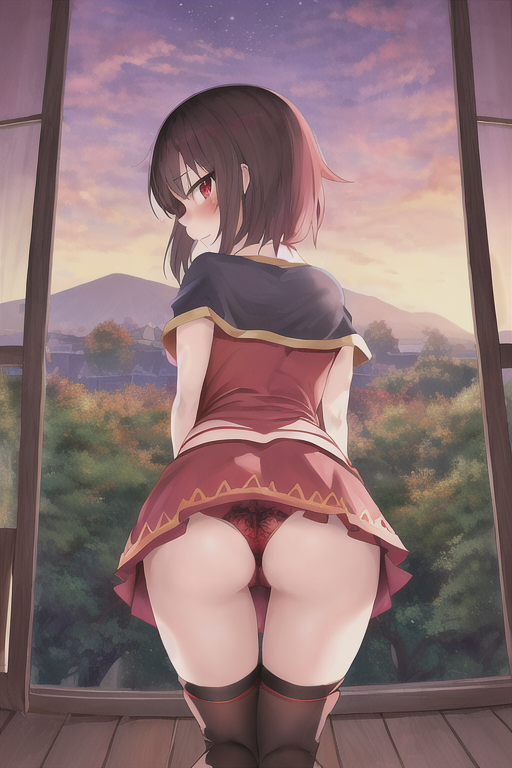

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: ignored

In [5]:
#@title <font color='Orange'>Г</font><font color='Purple'>е</font><font color='Red'>н</font><font color='Orange'>е</font><font color='Purple'>р</font><font color='Red'>а</font><font color='Orange'>ц</font><font color='Purple'>и</font><font color='Red'>я</font> - *(~25 сек на один арт)*

def_prompt=  ', symmetric highly detailed eyes, (acrylic painting), hyper detailed, intricate, illustration'
def_nprompt= 'lowres, bad anatomy, (bad eyes), bad hands, (((text))), error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, '
def_seed=random.randint(1,100000000)

prompt = 'art of a witch girl, megumin konosuba, short hair, erotic upskirt, red skirt, panties, ass, view from back, full height view' #@param {type:"string"}
nprompt = '' #@param {type:"string"}
prompt=english(prompt)
nprompt=english(nprompt)

auto_optimize_prompts = True #@param {type:"boolean"}
if auto_optimize_prompts:
  nprompt=def_nprompt+nprompt
  prompt=prompt+def_prompt

#@markdown ---

seed=707 #@param {type:"integer"}
number_of_arts=1 #@param {type:"integer"}

if seed==0:seed=def_seed

#@markdown ---

auto_download_images = True #@param {type:"boolean"}
#~25 сек на одно изображение

ims=[]
for i in range(number_of_arts):
  tseed=seed+i
  print(f"Drawing...")
  print(f"Prompt      : {prompt}")
  print(f"Anti-Prompt : {nprompt}")
  print(f"Seed        : {tseed}")
  ims+=Txt2Img(prompt,nprompt,size=(512,768),guidance_scale=7.5,seed=tseed)


show_images(ims)
if auto_download_images :download_images(ims)

---
**Внимание!** Модель очень зависима от промптов.

Например, две *одинаковые* мегумин

`"art of a witch girl, megumin konosuba, short hair"`

![download](https://user-images.githubusercontent.com/52743561/207110859-151df7aa-7263-4b13-8bf4-21602942c2fc.png)


`"art of a witch girl, megumin konosuba, short hair" + auto_optimize_prompts`

![download](https://user-images.githubusercontent.com/52743561/207111357-77b1331f-b794-42e4-be21-b1a70acb2e8d.png)

По сути, я не вносил в `auto_optimize_prompts` изменения размера ее груди или позы.

Единственное, что фиксит `auto_optimize_prompts` - это стиль арта и предостерегает нейросеть от частых ошибок, вроде 3 ног у человека или 7 пальцев на руке )

Итоговый результат показывает, насколько при работе с Anything очень важен **prompt engineering** и красота арта будет сильно зависеть от вашего запроса!